In [83]:
import h5py    
import numpy as np    
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u
from astropy import constants as const

In [84]:
import matplotlib.pyplot as plt

In [85]:
yrsec = (1*u.yr).to(u.s).value # 1 year in secs
solar_mass = const.M_sun.value #in Kgs

#hubble_time = (1/cosmo.H(0)).to(u.yr).value #Hubble time = 1/H0 
age_of_the_universe = cosmo.age(0).to(u.yr).value


In [86]:
#parent folder
pfolder = "/Users/pranavsatheesh/Triples/Github/"
import sys
sys.path.append(pfolder)

file_name = pfolder + "Illustris_Data/mbhb-evolution_no-ecc_lc-full-0.6.hdf5"
f1 = h5py.File(file_name,'r') 
Ms = np.array(f1['evolution']['masses'])
t = np.array(f1['evolution']['times'])
r = np.array(f1['evolution']['sep'])

Nbinary = len(Ms)
M1 = Ms[:,0]
M2 = Ms[:,1]



M1 = M1/(solar_mass*10**3) #mass in gs (verify this)
M2 = M2/(solar_mass*10**3)#mass in gs (verify this)

In [87]:
np.max(M1)/10**10

1.4987357954545455

(array([3384., 2588., 1519.,  839.,  458.,  222.,  118.,   65.,   24.,
          17.]),
 array([6.00009499, 6.34023656, 6.68037813, 7.0205197 , 7.36066127,
        7.70080284, 8.04094441, 8.38108598, 8.72122755, 9.06136912,
        9.40151069]),
 <BarContainer object of 10 artists>)

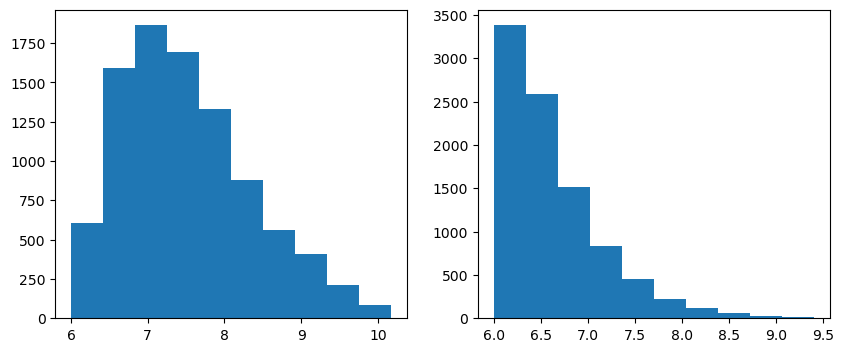

In [88]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(np.log10(M1))
ax[1].hist(np.log10(M2))

In [89]:
Triple_df = pd.read_csv("Data/triple_data_ill.csv")

In [90]:
Triple_df

,BH1_ID1,BH1_ID2,BH2_ID1,BH2_ID2,M1_bin_1,M2_bin_1,M1_bin_2,M2_bin_2,t1,t2,tmerger
0,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,3.286581e+07,1.253781e+07,5.276829e+07,8.204738e+06,2.055999e+09,1.988185e+09,1.985633e+09
1,9.223372e+18,9.223372e+18,3.402509e+18,9.223372e+18,1.059404e+07,2.885124e+06,3.132749e+08,4.211761e+07,3.255727e+11,7.265512e+09,5.529691e+09
2,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.655162e+07,6.537747e+06,7.257406e+07,4.653945e+07,5.274952e+10,1.032617e+10,3.025313e+09
3,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.259004e+07,3.439988e+06,2.386990e+07,2.216544e+06,5.883422e+09,1.284130e+12,1.972738e+09
4,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.325181e+08,1.408275e+07,4.551391e+08,1.002870e+06,1.206497e+10,7.389760e+09,4.814316e+09
...,...,...,...,...,...,...,...,...,...,...,...
526,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,5.557129e+07,8.642577e+06,1.019236e+08,6.895766e+07,3.514319e+10,1.323119e+10,1.241580e+10
527,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,2.426127e+08,2.139748e+07,2.724291e+08,1.692168e+06,1.468992e+10,1.466670e+10,1.354208e+10
528,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.325318e+07,8.303175e+06,2.158876e+07,6.823273e+06,1.927055e+11,1.358702e+10,1.311330e+10
529,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,4.575134e+07,9.468752e+06,5.555056e+07,5.338969e+07,4.607816e+10,1.945157e+10,1.355722e+10


In [91]:
for i in range(len(Triple_df)):
    if(Triple_df["M2_bin_1"].iloc[i] < Triple_df["M2_bin_2"].iloc[i]):
        print("doesnt work here",i)
        print(Triple_df["M1_bin_2"].iloc[i],Triple_df["M1_bin_1"].iloc[i])
        print(Triple_df["M2_bin_1"].iloc[i],Triple_df["M2_bin_2"].iloc[i])

doesnt work here 1
313274922.5745633 10594043.351753648
2885123.8534906125 42117613.779877335
doesnt work here 2
72574057.73281921 16551621.82549644
6537747.197727833 46539454.85491408
doesnt work here 5
463679148.5624218 2107130.3181232647
1700773.64577267 18192612.07769223
doesnt work here 6
59164969.16113835 6305600.186280129
2841713.4415750485 3307455.8982340787
doesnt work here 7
323523301.46872824 10961349.113810554
2726974.76696669 10953396.928441657
doesnt work here 8
12663414.989705669 5010828.204582656
1061453.442940957 6693184.021027721
doesnt work here 13
5793096.039585786 2264398.9841242023
1200305.699647392 1683591.2452434478
doesnt work here 14
34604928.65592282 9140185.061685205
1599170.2773540053 2738576.4374066684
doesnt work here 15
956751562.294626 59059602.705000475
2506372.6246349 10019128.750244483
doesnt work here 17
297803661.9327555 168981099.0228406
33386824.26138012 123480966.3949792
doesnt work here 18
37011884.76311551 5422836.6086775735
1663653.980497144 

In [118]:
for i in range(len(Triple_df)):
    qin_old = Triple_df["M2_bin_1"].iloc[i]/Triple_df["M1_bin_1"].iloc[i]
    
    if(Triple_df["M2_bin_1"].iloc[i] > Triple_df["M1_bin_1"].iloc[i]):
        print("doesnt work here",i)

(array([61., 95., 99., 95., 75., 52., 28., 10., 15.,  1.]),
 array([6.00124463, 6.33997375, 6.67870287, 7.017432  , 7.35616112,
        7.69489024, 8.03361936, 8.37234849, 8.71107761, 9.04980673,
        9.38853585]),
 <BarContainer object of 10 artists>)

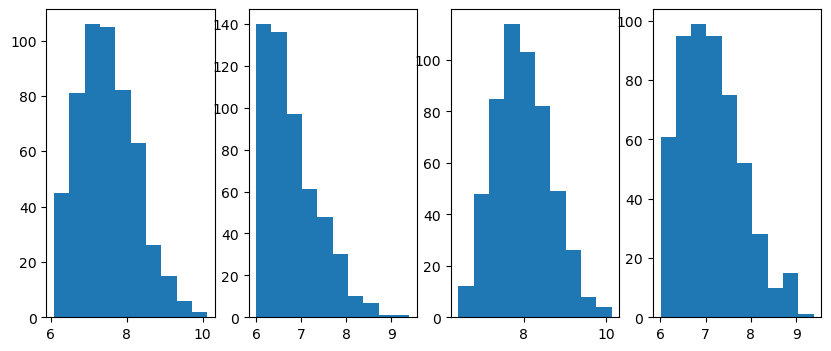

In [92]:
fig,ax = plt.subplots(1,4,figsize=(10,4))
ax[0].hist(np.log10(Triple_df["M1_bin_1"]))
ax[1].hist(np.log10(Triple_df["M2_bin_1"]))
ax[2].hist(np.log10(Triple_df["M1_bin_2"]))
ax[3].hist(np.log10(Triple_df["M2_bin_2"]))

In [93]:
Ntriple = len(Triple_df)

In [143]:
m1_list = []
m1_id = []
m2_list = []
m2_id = []
m3_list = []
m3_id = []

for i in range(Ntriple):

    qin_old = Triple_df["M2_bin_1"].iloc[i]/Triple_df["M1_bin_1"].iloc[i]


    if((Triple_df["BH1_ID1"].iloc[i]==Triple_df["BH2_ID1"].iloc[i]) or (Triple_df["BH1_ID2"].iloc[i]==Triple_df["BH2_ID1"].iloc[i]) ):
        
        m3 = Triple_df["M2_bin_2"].iloc[i]
        mA = Triple_df["M1_bin_2"].iloc[i]
    
    elif((Triple_df["BH1_ID1"].iloc[i]==Triple_df["BH2_ID2"].iloc[i]) or (Triple_df["BH1_ID2"].iloc[i]==Triple_df["BH2_ID2"].iloc[i]) ):

        m3 = Triple_df["M1_bin_2"].iloc[i]
        mA = Triple_df["M2_bin_2"].iloc[i]

    else:
        print("huh")
        print(i)

    m2 = mA*qin_old
    m1 = mA*(1-qin_old)
    

    m1_list.append(max(m1,m2))
    m2_list.append(min(m1,m2))
    m3_list.append(m3)

m1_list = np.array(m1_list)
m2_list = np.array(m2_list)
m3_list = np.array(m3_list)

Text(0.5, 0, 'log(m3)')

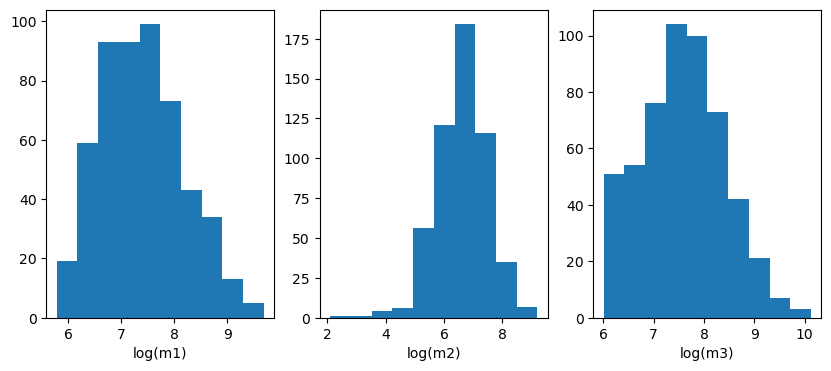

In [151]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].hist(np.log10(m1_list))
ax[0].set_xlabel("log(m1)")
ax[1].hist(np.log10(m2_list))
ax[1].set_xlabel("log(m2)")
ax[2].hist(np.log10(m3_list))
ax[2].set_xlabel("log(m3)")

Text(0.5, 0, 'log(qout)')

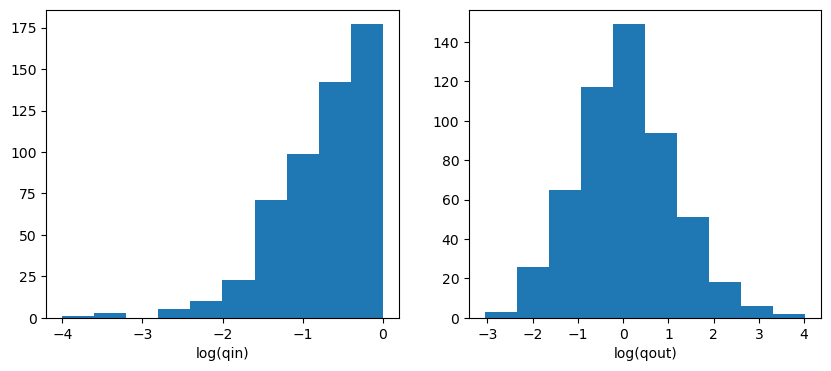

In [154]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(np.log10((m2_list)/(m1_list)))
ax[0].set_xlabel("log(qin)")
ax[1].hist(np.log10((m3_list)/(m1_list + m2_list)))
ax[1].set_xlabel("log(qout)")